In [ ]:
%cd /content/drive/MyDrive/Binar DSC/Kuis/Challenge GOLD

/content/drive/MyDrive/Binar DSC/Kuis/Challenge GOLD


In [ ]:
ls

abusive.csv  citation.bib  data.csv  new_kamusalay.csv  README.md


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Binar DSC/Kuis/Challenge GOLD/data.csv', encoding='latin1')
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
df.shape

(13169, 13)

In [ ]:
# check total missing values pada tiap kolom
df.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [ ]:
# melihat dang menghilangkan data yang terduplikasi
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13164    False
13165    False
13166    False
13167    False
13168    False
Length: 13169, dtype: bool

In [ ]:
df.duplicated().sum()

125

In [ ]:
df[df.duplicated()]

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
295,#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 ...,0,0,0,0,0,0,0,0,0,0,0,0
378,#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 ...,0,0,0,0,0,0,0,0,0,0,0,0
1559,Presiden yang anda tuduh Rezim anti Islam suda...,1,0,1,0,0,0,0,0,1,1,0,0
1565,USER USER USER USER USER USER USER USER USER U...,0,0,0,0,0,0,0,0,0,0,0,0
1583,Saya suka video USER,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,I added a video to a USER playlist,0,0,0,0,0,0,0,0,0,0,0,0
12952,USER USER USER USER USER USER USER USER USER U...,0,0,0,0,0,0,0,0,0,0,0,0
12953,"SETUJU SAYA,KLAU AHOK DAPAT GELAR SANTRI KEHOR...",1,1,1,0,0,0,0,0,1,1,0,0
12985,USER ahmad dhani yang terhormat paling babi pa...,1,1,1,0,0,0,0,1,0,1,0,0


In [ ]:
df = df.drop_duplicates()
df.shape

(13044, 13)

In [ ]:
# menghitung banyaknya karakter dalam 1 tweet
df['total_char'] = df.Tweet.apply(len)

<ipython-input-17-94a1df82ddf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_char'] = df.Tweet.apply(len)


In [ ]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89


In [ ]:
# menghitung banyaknya kata dalam 1 tweet
df['total_word'] = df.Tweet.apply(lambda sent: len(sent.split()))

<ipython-input-19-b6bd80d564d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_word'] = df.Tweet.apply(lambda sent: len(sent.split()))


In [ ]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14


In [ ]:
# TOTAL CHAR
# mencari nilai minimum dan maksimum
p0 = df.total_char.min()

p100 = df.total_char.max()

# Quartile 1
q1 = df.total_char.quantile(0.25)

# Quartile 2
q2 = df.total_char.quantile(0.50)

# Quartile 3
q3 = df.total_char.quantile(0.75)

# Cari IQR
iqr = q3 - q1

# batas bawah
lower_limit = q1-1.5*iqr

# batas atas
upper_limit = q3+1.5*iqr

print("Nilai Q1:", q1)
print("Nilai Q2:", q2)
print("Nilai Q3:", q3)

# menentukan batas outlier dari data yg kita punya
print("Batas bawah total char:", lower_limit)
print("Nilai minimum:", p0)
if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()

print("Batas atas total char:", upper_limit)
print("Nilai maksimum:", p100)
if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

print()

Nilai Q1: 59.0
Nilai Q2: 100.0
Nilai Q3: 152.0
Batas bawah total char: -80.5
Nilai minimum: 4
Tidak ada outlier dari sisi batas bawah

Batas atas total char: 291.5
Nilai maksimum: 561
Ada outlier dari sisi batas atas



In [ ]:
# TOTAL WORD
# mencari nilai minimum dan maksimum
p0 = df.total_word.min()

p100 = df.total_word.max()

# Quartile 1
q1 = df.total_word.quantile(0.25)

# Quartile 2
q2 = df.total_word.quantile(0.50)

# Quartile 3
q3 = df.total_word.quantile(0.75)

# Cari IQR
iqr = q3 - q1

# batas bawah
lower_limit = q1-1.5*iqr

# batas atas
upper_limit = q3+1.5*iqr

print("Nilai Q1:", q1)
print("Nilai Q2:", q2)
print("Nilai Q3:", q3)

# menentukan batas outlier dari data yg kita punya
print("Batas bawah total word:", lower_limit)
print("Nilai minimum:", p0)
if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()

print("Batas atas total word:", upper_limit)
print("Nilai maksimum:", p100)
if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

print()

Nilai Q1: 9.0
Nilai Q2: 15.0
Nilai Q3: 23.0
Batas bawah total word: -12.0
Nilai minimum: 1
Tidak ada outlier dari sisi batas bawah

Batas atas total word: 44.0
Nilai maksimum: 52
Ada outlier dari sisi batas atas



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

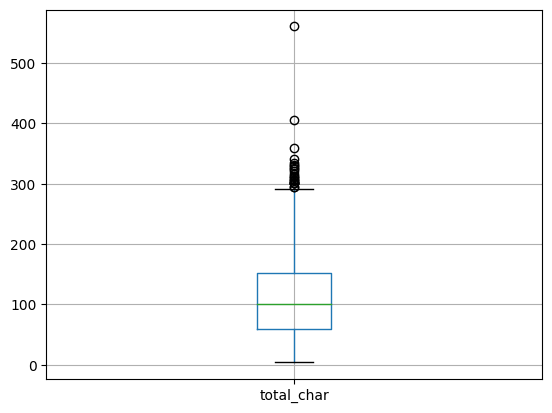

In [ ]:
boxplot = df.boxplot(column=['total_char'])

In [ ]:
boxplot = df.boxplot(column=['total_word'])

<Axes: >

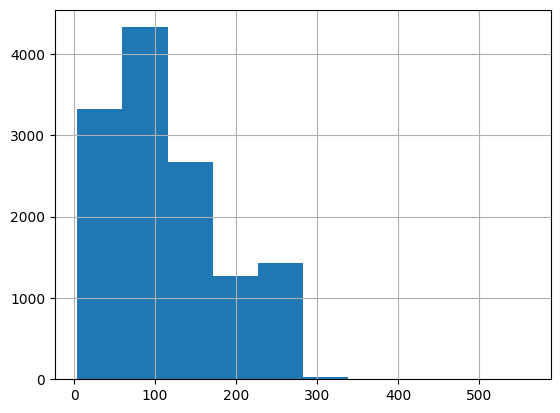

In [ ]:
# HISTOGRAM
df.total_char.hist()
# banyaknya karakter dalam sebuah tweet rata-rata berkisar 50-100

<Axes: >

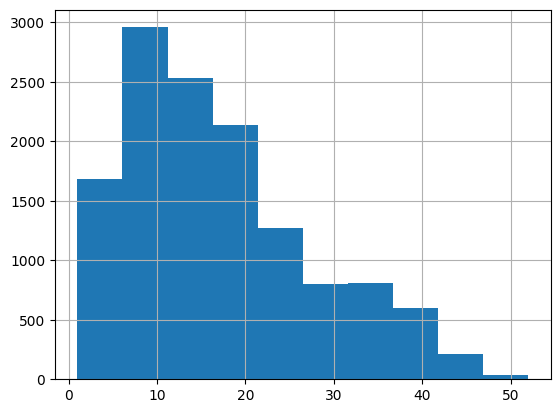

In [ ]:
df.total_word.hist()
# banyaknya kata dalam sebuah tweet rata-rata berkisar 5-10

<Axes: xlabel='total_char', ylabel='total_word'>

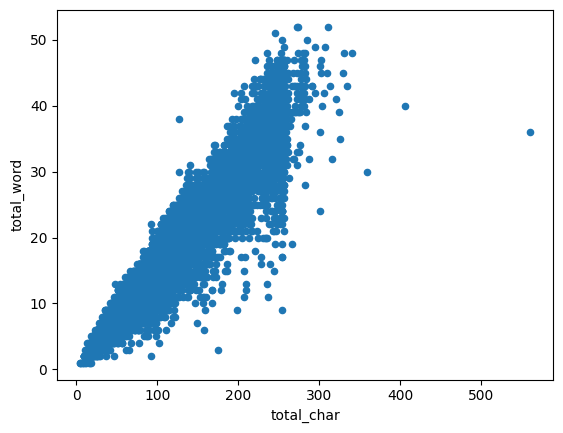

In [ ]:
# SCATTER
df.plot(x = 'total_char', y = 'total_word', kind = 'scatter')
# korelasi positif dibuktikan dengan visualisasi sebagai berikut

In [ ]:
#Cleansing Data
def cleansing_kata(text):
    # Menghapus karakter non-alfanumerik
    text = re.sub(r'[^\w\s]', '', text)
    
    # Menghapus whitespace tambahan
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Mengubah semua huruf menjadi huruf kecil
    text = text.lower()

    # Menghilangkan URL
    text= re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)

    text = re.sub('[^0-9a-zA-Z]+',' ',text)
    text = re.sub('\n',' ',text)
    text = re.sub('rt',' ',text)
    text = re.sub('user',' ',text)
    text = text.strip()
    return text

In [ ]:
df['Tweet']= df['Tweet'].apply(cleansing_kata)

<ipython-input-30-9c20d6bde565>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet']= df['Tweet'].apply(cleansing_kata)


In [ ]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,disaat semua cowok berusaha melacak perhatian ...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,siapa yang telat ngasih tau eluedan sarap gue ...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,41 kadang aku berfikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,aku itu akunnku tau matamu sipit tapi diliat d...,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,kaum cebong kapir udah keliatan dongoknya dari...,1,1,0,1,1,0,0,0,0,0,1,0,89,14


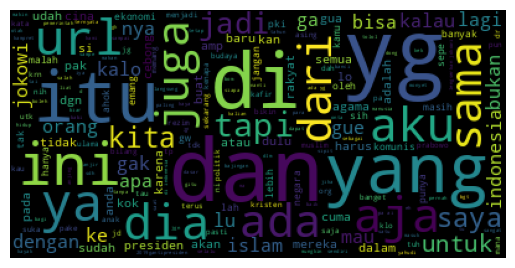

In [ ]:
# WORDCLOUD
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = ' '.join(df['Tweet'])
wordcloud = WordCloud().generate(text)

# Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()